In [1]:
import glob
import cv2 as cv
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Resizes the loaded image to a fixed size of 244 x 244 pixels.The resized image is stored back in the **image** variable.

Pixel value normalization by dividing all pixel values in the image by **255.0**. It is a **preprocessing** step ,as it scales the pixel values from the range of **0-255** (for an 8-bit image) to the range of **0-1**. By making the images to in a consistant size (standard numerical range), for to get eaasy for the algorithm to process.

In [2]:
def load_image(image_path):
    image = cv.imread(image_path)
    image = cv.resize(image, (244, 244))
    image = image / 255.0
    return image

Checking the image by viewing (244,244)

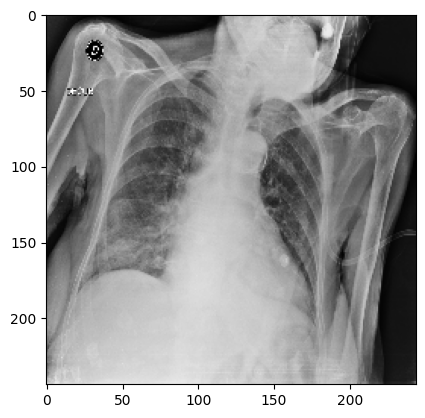

In [3]:
image = load_image('Corona/Data/test/COVID19/COVID19(460).jpg')
plt.imshow(image)
plt.show()

In [4]:
def load_dataset():
    # Get paths to training and testing image files
    train_image_paths = glob.glob("Corona/Data/train/*/*")
    test_image_paths = glob.glob("Corona/Data/test/*/*")

# Initialize lists to store image data (X) and labels (Y) for both training and testing
    Xtrain, Xtest = [], []
    Ytrain, Ytest = [], []

# Define Dictionary mapping class
    label_dict = {
                'PNEUMONIA' : 0,
                'COVID19' : 1,
                'NORMAL': 2
                }

    for train_image in train_image_paths:
        name = train_image.split('\\')[1]
        label = label_dict[name]

        image = load_image(train_image)
        Xtrain.append(image)
        Ytrain.append(label)

    for test_image in test_image_paths:
        name = train_image.split('\\')[1]
        label = label_dict[name]

        image = load_image(test_image)
        Xtest.append(image)
        Ytest.append(label)

    Xtrain = np.asarray(Xtrain)
    Xtest = np.asarray(Xtest)
    Ytrain = np.asarray(Ytrain)
    Ytest = np.asarray(Ytest)

    return Xtrain, Xtest, Ytrain, Ytest

The **name** is extracted from the file path by splitting the path at the **\\** character and taking the second part (**[1]**) 

In [5]:
Xtrain, Xtest, Ytrain, Ytest = load_dataset()

In [6]:
print("X train shape: ", Xtrain.shape)
print("Y train shape: ", Ytrain.shape)
print("X test shape: ", Xtest.shape)
print("Y test shape: ", Ytest.shape)

X train shape:  (5144, 244, 244, 3)
Y train shape:  (5144,)
X test shape:  (1288, 244, 244, 3)
Y test shape:  (1288,)


In [8]:
input_shape = (244, 244, 3)
model = tf.keras.models.Sequential([
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                # tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
                                # tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dropout(0.5),
                                tf.keras.layers.Dense(128, activation='relu'),
                                tf.keras.layers.Dense(3, activation='softmax')
                                ])
model.summary()

c:\Users\abina\anaconda3\envs\sliit\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 121, 121, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 119, 119, 128)     │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 59, 59, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 128)       │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 100352)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 100352)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 128)               │ 12,845,184 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 3)                 │        387 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 13,068,803 (49.85 MB)

 Trainable params: 13,068,803 (49.85 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

history = model.fit(
        Xtrain, 
        Ytrain, 
        epochs=20,
        batch_size=8,
        validation_split=0.2
        )

Epoch 1/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 441s 850ms/step - accuracy: 0.7428 - loss: 0.6624 - val_accuracy: 0.9329 - val_loss: 0.2031
Epoch 2/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 444s 860ms/step - accuracy: 0.9117 - loss: 0.2522 - val_accuracy: 0.9689 - val_loss: 0.1037
Epoch 3/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 442s 858ms/step - accuracy: 0.9341 - loss: 0.1970 - val_accuracy: 0.9475 - val_loss: 0.1558
Epoch 4/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 443s 861ms/step - accuracy: 0.9423 - loss: 0.1597 - val_accuracy: 0.9631 - val_loss: 0.1108
Epoch 5/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 434s 842ms/step - accuracy: 0.9550 - loss: 0.1223 - val_accuracy: 0.9543 - val_loss: 0.1368
Epoch 6/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 436s 847ms/step - accuracy: 0.9579 - loss: 0.1089 - val_accuracy: 0.9757 - val_loss: 0.0872
Epoch 7/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 439s 852ms/step - accuracy: 0.9645 - loss: 0.0940 - val_accuracy: 0.9679 - val_loss: 0.0910
Epoch 8/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 432s 838ms/step - accuracy: 0.9673 -

**Underfitting**

This usually occurs when the model is not complex enough or has insufficient capacity to learn from the training data, which leads to poor performance on tests or unseen data in addition to the training set. Model may not be able to capture the variations and complicated relationships found in the data if it is very basic. But verly aggressive regularization techniques with high regularization parameters, can constrain  model's complexity too much, making it to underfitting.

**Overfitting**

When a machine learning model grows overly complicated and learns to represent the noise  in the training data instead of the fundamental patterns. This can occur when the model has too many parameters compared to the quantity of training data available, resulting in the model to become more adept in memorization of the training examples than effective standardisation. Overfitting can also result in using a high-dimensional feature space with little data, training for an excessive amount of time, and insufficient normalisation. Poor performance on the test or validation set results from the overfitted model's inability to be applied to new, unknown data, despite its extraordinary performance on the training set. 

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

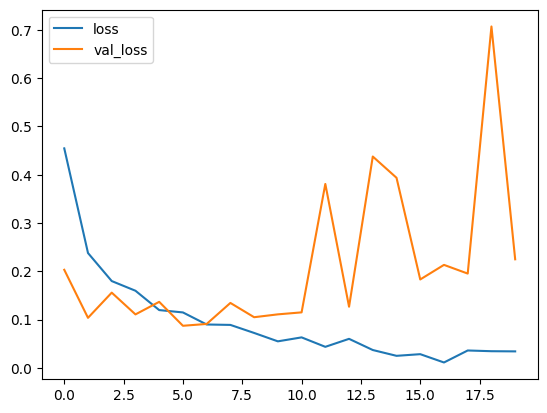

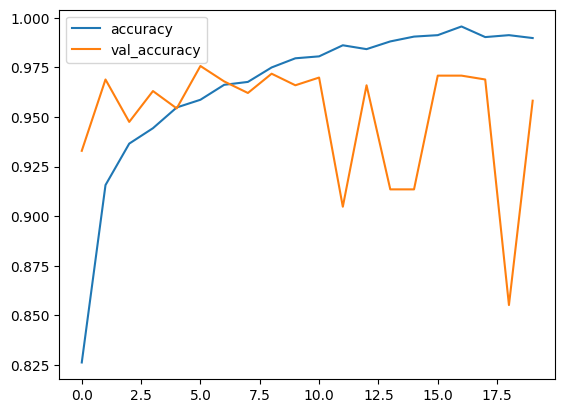

161/161 ━━━━━━━━━━━━━━━━━━━━ 159s 955ms/step - accuracy: 0.9981 - loss: 0.0078
Test accuracy: 0.9908631443977356
161/161 ━━━━━━━━━━━━━━━━━━━━ 158s 947ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3418
           1       0.99      1.00      0.99       460
           2       0.97      1.00      0.98      1266

    accuracy                           0.99      5144
   macro avg       0.99      0.99      0.99      5144
weighted avg       0.99      0.99      0.99      5144

[[3375    6   37]
 [   0  460    0]
 [   4    0 1262]]


In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

# Evaluate the model ( F1-score , precision-recall curves)
loss, accuracy = model.evaluate(Xtrain, Ytrain)
print("Test accuracy:", accuracy)

predictions = model.predict(Xtrain)
# Extract predicted class labels
y_pred = np.argmax(predictions, axis=1)  

print(classification_report(Ytrain, y_pred))
cm = confusion_matrix(Ytrain, y_pred)
print(cm)

161/161 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step


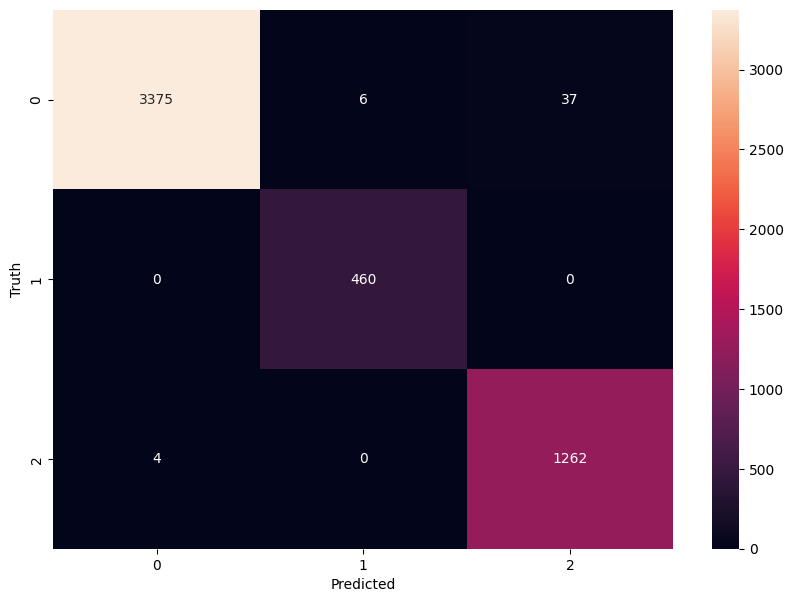

In [12]:
Ptrain = model.predict(Xtrain)
Ptrain = np.argmax(Ptrain, axis=1)

cm = confusion_matrix(Ytrain, Ptrain)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [13]:
import joblib

joblib.dump(model.get_weights(), "model_weights_2.joblib")
joblib.dump(model.to_json(), "model_architecture_2.joblib")

['model_architecture_2.joblib']